# Amazon Find Food Reviews

## Import Necessary Packages and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
plt.style.use('ggplot')

import re 
import warnings 


%matplotlib inline 

## Load Dataset

In [2]:
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/Uma/Desktop/Springboard/amazon-fine-food-reviews/Reviews.csv')


In [4]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,568444,568445,568446,568447,568448,568449,568450,568451,568452,568453
Id,1,2,3,4,5,6,7,8,9,10,...,568445,568446,568447,568448,568449,568450,568451,568452,568453,568454
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B000E7L2R4,B00171APVA,...,B001EO7N10,B001EO7N10,B001EO7N10,B001EO7N10,B001EO7N10,B001EO7N10,B003S1WTCU,B004I613EE,B004I613EE,B001LR2CU2
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T,ADT0SRK1MGOEU,A1SP2KVKFXXRU1,A3JRGQVEQN31IQ,A1MZYO9TZK0BBI,A21BT40VZCCYT4,...,A2SD7TY3IOX69B,A2E5C8TTAED4CQ,A2P9W8T7NTLG2Z,APWCOAVILK94B,A1F6BHEYB7R6R7,A28KG5XORO54AY,A3I8AFVPEE8KI5,A121AA1GQV751Z,A3IBEVCTXKNOH,A3LGQPJCZVL9UC
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir""",Twoapennything,David C. Sullivan,Pamela G. Williams,R. James,Carol A. Reed,...,"BayBay ""BayBay Knows Best""",S. Linkletter,Andy,"Real Named Person ""wowzee""",James Braley,Lettie D. Carter,R. Sawyer,"pksd ""pk_007""","Kathy A. Welch ""katwel""",srfell17
HelpfulnessNumerator,1,0,1,3,0,0,0,0,1,0,...,3,2,0,0,0,0,0,2,1,0
HelpfulnessDenominator,1,0,1,3,0,0,0,0,1,0,...,3,2,0,0,0,0,0,2,1,0
Score,5,1,4,2,5,4,5,5,5,5,...,5,5,2,5,5,5,2,5,5,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600,1342051200,1340150400,1336003200,1322006400,1351209600,...,1245369600,1268006400,1328918400,1322524800,1308096000,1299628800,1331251200,1329782400,1331596800,1338422400
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy,Nice Taffy,Great! Just as good as the expensive brands!,"Wonderful, tasty taffy",Yay Barley,Healthy Dog Food,...,Best Value for Chinese 5 Spice,Five Spice Powder,Mixed wrong,"If its all natural, this is like panacea of Sp...",Very large ground spice jars.,Will not do without,disappointed,Perfect for our maltipoo,Favorite Training and reward treat,Great Honey
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...,I got a wild hair for taffy and ordered this f...,This saltwater taffy had great flavors and was...,This taffy is so good. It is very soft and ch...,Right now I'm mostly just sprouting this so my...,This is a very healthy dog food. Good for thei...,...,"As a foodie, I use a lot of Chinese 5 Spice po...","You can make this mix yourself, but the Star A...",I had ordered some of these a few months back ...,"Hoping there is no MSG in this, this tastes ex...",My only complaint is that there's so much of i...,Great for sesame chicken..this is a good if no...,I'm disappointed with the flavor. The chocolat...,"These stars are small, so you can give 10-15 o...",These are the BEST treats for training and rew...,"I am very satisfied ,product is as advertised,..."


## Understand dataset features and values 


In [6]:
data.index

RangeIndex(start=0, stop=568454, step=1)

In [7]:
data.values

array([[1, 'B001E4KFG0', 'A3SGXH7AUHU8GW', ..., 1303862400,
        'Good Quality Dog Food',
        'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'],
       [2, 'B00813GRG4', 'A1D87F6ZCVE5NK', ..., 1346976000,
        'Not as Advertised',
        'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'],
       [3, 'B000LQOCH0', 'ABXLMWJIXXAIN', ..., 1219017600,
        '"Delight" says it all',
        'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful

In [8]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
list(data)

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

## Data Wrangling & Visualizations

### Dealing with Missing Data: Dropping Missing Values


In [10]:
#Clean data labeled as dc
dc = data.dropna()

In [11]:
dc.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568412.000000,568412.000000,568412.000000,568412.000000,5.684120e+05
mean,284227.631500,1.743871,2.227872,4.183307,1.296261e+09
std,164098.939433,7.636774,8.288745,1.310368,4.803790e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.750000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.500000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.250000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [12]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568412 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568412 non-null int64
ProductId                 568412 non-null object
UserId                    568412 non-null object
ProfileName               568412 non-null object
HelpfulnessNumerator      568412 non-null int64
HelpfulnessDenominator    568412 non-null int64
Score                     568412 non-null int64
Time                      568412 non-null int64
Summary                   568412 non-null object
Text                      568412 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [13]:
dc['Score'].value_counts()

5    363111
4     80655
1     52264
3     42639
2     29743
Name: Score, dtype: int64

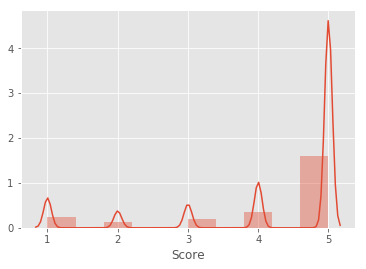

In [14]:
sns.distplot(dc['Score'],bins=10)
plt.show()

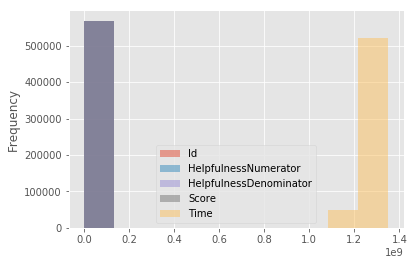

In [15]:
dc.plot.hist(alpha=0.5)
plt.show()

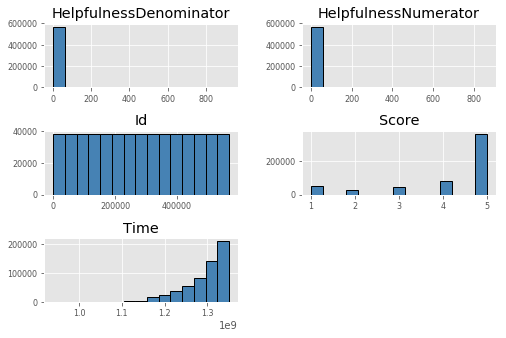

In [16]:
dc.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid= True)
plt.tight_layout(rect=(0,0, 1.2, 1.2))

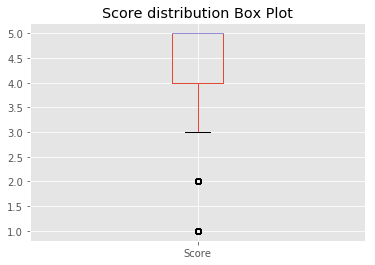

In [17]:
dc[['Score']].plot.box()
plt.title('Score distribution Box Plot')
plt.show()

In [18]:
print(dc.dtypes)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [19]:
dc['HelpfulnessRatio']=(dc['HelpfulnessNumerator']/dc['HelpfulnessDenominator'])*100

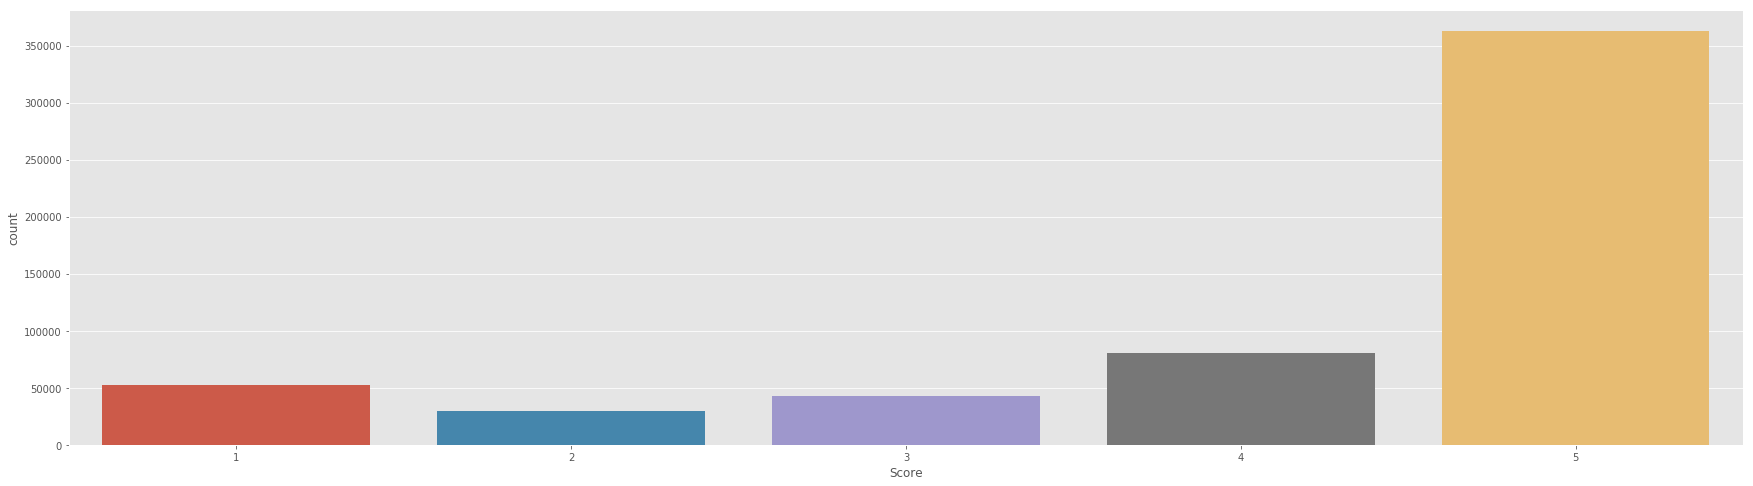

In [20]:
plt.figure(figsize=(30,8))
sns.countplot(x="Score", data=dc)
plt.show()

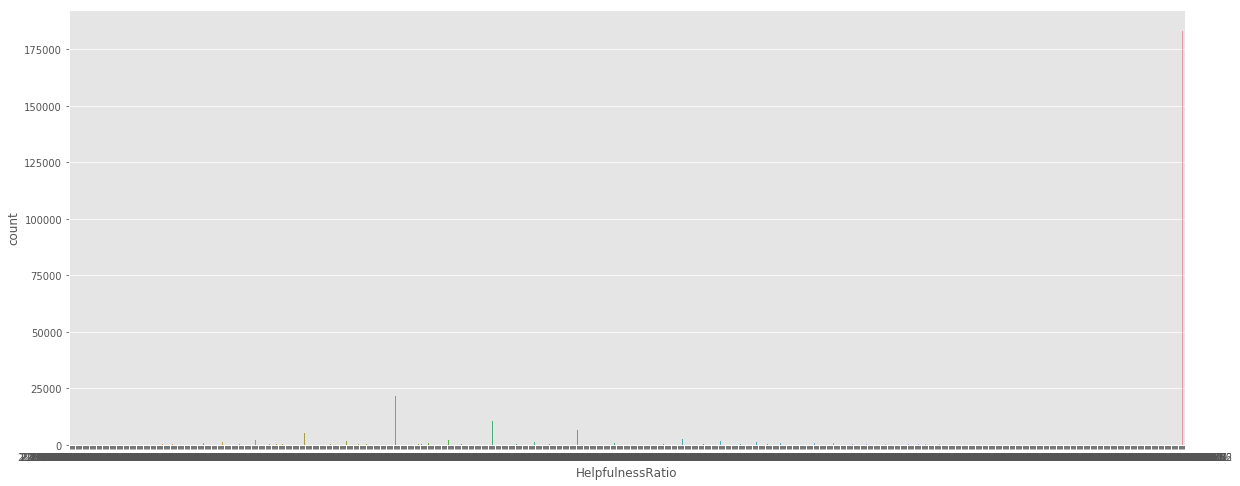

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x="HelpfulnessRatio", data=dc)

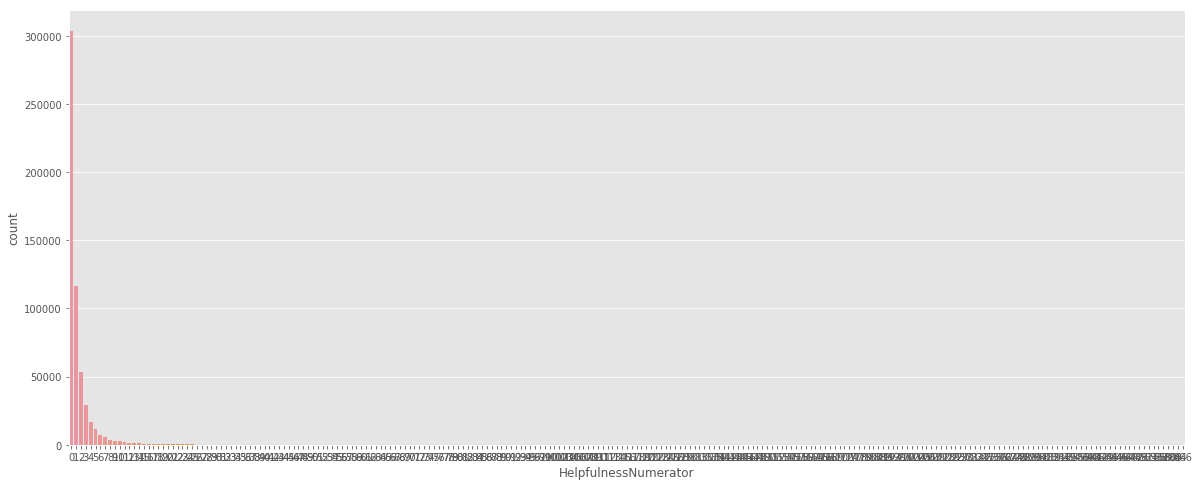

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x="HelpfulnessNumerator", data=dc)

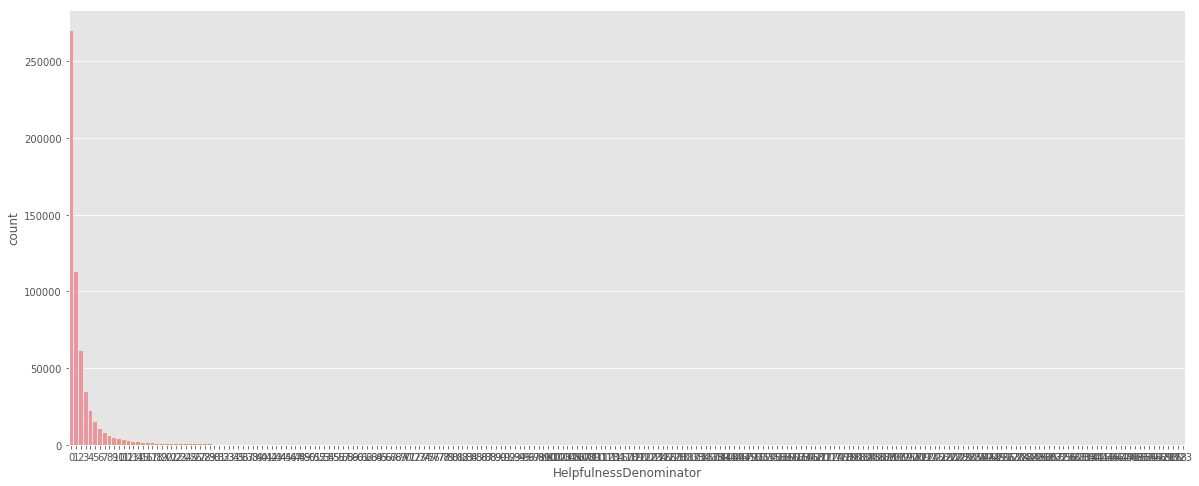

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(x="HelpfulnessDenominator", data=dc)

## Data Story Statistical Inference


### Inferential Statistics 
By applying statistical tests on the dataset (mainly 2 sample T-tests and Chi Squared tests), we can determine if there's a significant mean difference between two groups. In this case, we will focus on Heroin. Why? 

In [24]:
from sklearn import datasets 
import matplotlib.pyplot as plt
plt.style
type(dc)
print(dc.keys())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio'],
      dtype='object')


In [25]:
import nltk

In [26]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata


In [27]:
nlp= spacy.load('en_core_web_md', parse=True, tag=True, entity=True)

In [28]:
#Deleting all the duplicates having the same userID, Profile, NameTime and Text all in the same column.
dc_clean =  dc.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first")

In [29]:
#Removing HTML tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [30]:
#Removing Accented Characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [31]:
#Removing Special Characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [32]:
#Punctuation Removal
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)
strippunc("fsd*?~,,,( sdfsdfdsvv)#")

'fsd sdfsdfdsvv'